In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
from datetime import date


import warnings 
warnings.filterwarnings('ignore')

In [58]:
url = 'https://raw.githubusercontent.com/Marcellopp/Desarollo-de-applicaciones-mobiles/main/healthy_lifestyle_city_2021.csv'
download = requests.get(url).content

In [59]:
Healthy = pd.read_csv(io.StringIO(download.decode('utf-8')))
Healthy.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [60]:
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [61]:
Healthy['Sunshine hours(City)'] = Healthy['Sunshine hours(City)'].apply(lambda x: np.nan if x == '-' else int(x))
Healthy['Cost of a bottle of water(City)'] = Healthy['Cost of a bottle of water(City)'].apply(lambda x: float(x[1:]))
Healthy['Obesity levels(Country)'] = Healthy['Obesity levels(Country)'].apply(lambda x:  float(x.split('%')[0]))
Healthy['Pollution(Index score) (City)'] = Healthy['Pollution(Index score) (City)'].apply(lambda x: np.nan if x == '-' else float(x))
Healthy['Annual avg. hours worked'] = Healthy['Annual avg. hours worked'].apply(lambda x: np.nan if x == '-' else int(x))
Healthy['Cost of a monthly gym membership(City)'] = Healthy['Cost of a monthly gym membership(City)'].apply(lambda x: float(x[1:]))

In [62]:
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [63]:
Healthy.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53


In [64]:
Healthy.drop('Rank',axis=1,inplace=True)

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

City = Healthy.City
Healthy.drop('City',axis=1,inplace=True)
col = Healthy.columns
imputer = IterativeImputer(max_iter=100)
Healthy = imputer.fit_transform(Healthy)
Healthy = pd.DataFrame(Healthy,columns=col)
Healthy['City'] = City
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sunshine hours(City)                    44 non-null     float64
 1   Cost of a bottle of water(City)         44 non-null     float64
 2   Obesity levels(Country)                 44 non-null     float64
 3   Life expectancy(years) (Country)        44 non-null     float64
 4   Pollution(Index score) (City)           44 non-null     float64
 5   Annual avg. hours worked                44 non-null     float64
 6   Happiness levels(Country)               44 non-null     float64
 7   Outdoor activities(City)                44 non-null     float64
 8   Number of take out places(City)         44 non-null     float64
 9   Cost of a monthly gym membership(City)  44 non-null     float64
 10  City                                    44 non-null     object 


In [66]:
Healthy = Healthy.groupby('City').mean()
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
City,,,,,,,,,,
Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.000000,7.44,422.0,1048.0,34.90
Bangkok,2624.0,0.22,10.0,74.1,76.64,1750.652313,5.99,377.0,1796.0,50.03
Barcelona,2591.0,1.19,23.8,82.2,65.19,1686.000000,6.40,585.0,2344.0,37.80
Beijing,2671.0,0.26,6.2,75.4,85.43,1751.432008,5.12,223.0,261.0,38.62
Berlin,1626.0,1.55,22.3,80.6,39.41,1386.000000,7.07,254.0,1729.0,26.11


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col = Healthy.columns
Healthy_Clust = scaler.fit_transform(Healthy)
Healthy_Clust = pd.DataFrame(Healthy_Clust,columns=col)
Healthy_Clust.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,-0.686679,1.050902,-0.151303,0.576878,-0.949133,-1.543390,1.025642,1.654432,-0.287788,-0.372094
1,0.691423,-1.342020,-1.183136,-0.777116,1.190812,0.406091,-0.454140,1.296541,0.257031,0.647795
2,0.632053,0.023353,0.186028,0.767581,0.654772,0.008057,-0.035719,2.950792,0.656178,-0.176610
3,0.775980,-1.285715,-1.560152,-0.529202,1.602322,0.410891,-1.342010,0.071759,-0.861015,-0.121335
4,-1.104068,0.530090,0.037206,0.462456,-0.552136,-1.838904,0.648043,0.318306,0.208231,-0.964614


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Healthy_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Healthy_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2620818916259195
For n_clusters=3, the silhouette score is 0.20480539368481754
For n_clusters=4, the silhouette score is 0.2202360064806543
For n_clusters=5, the silhouette score is 0.22332106610926183
For n_clusters=6, the silhouette score is 0.23676243539223074
For n_clusters=7, the silhouette score is 0.19349565503527
For n_clusters=8, the silhouette score is 0.2159628618202132


In [69]:
kmeans = KMeans(n_clusters=5,max_iter=100)
kmeans.fit(Healthy_Clust)

KMeans(max_iter=100, n_clusters=5)

In [70]:
Healthy['Cluster_ID'] = kmeans.labels_
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Cluster_ID
City,,,,,,,,,,,
Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.000000,7.44,422.0,1048.0,34.90,3
Bangkok,2624.0,0.22,10.0,74.1,76.64,1750.652313,5.99,377.0,1796.0,50.03,4
Barcelona,2591.0,1.19,23.8,82.2,65.19,1686.000000,6.40,585.0,2344.0,37.80,0
Beijing,2671.0,0.26,6.2,75.4,85.43,1751.432008,5.12,223.0,261.0,38.62,4
Berlin,1626.0,1.55,22.3,80.6,39.41,1386.000000,7.07,254.0,1729.0,26.11,3


Plotting the clusters

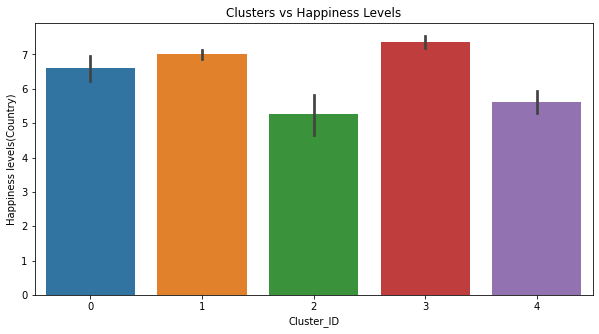

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(y='Happiness levels(Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Happiness Levels')
plt.show()

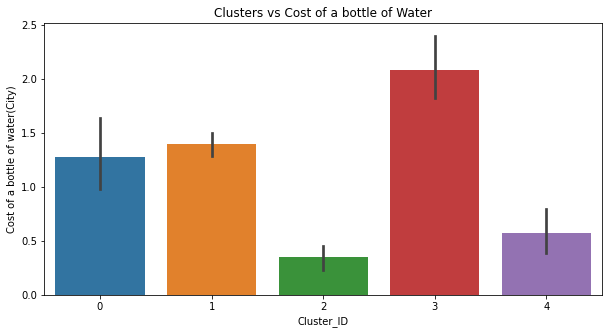

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(y='Cost of a bottle of water(City)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Cost of a bottle of Water')
plt.show()

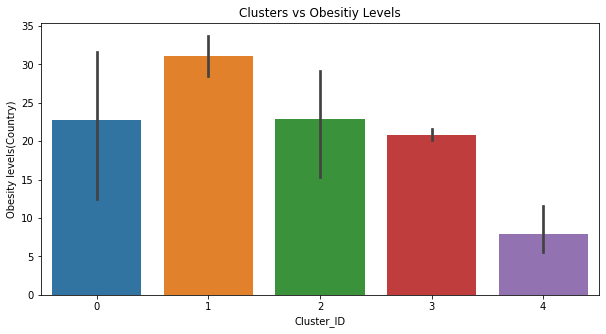

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(y='Obesity levels(Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Obesitiy Levels')
plt.show()

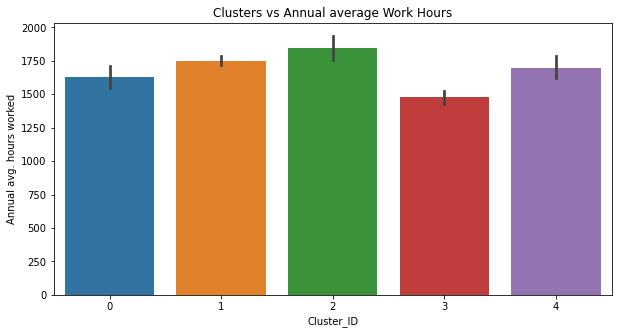

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(y='Annual avg. hours worked',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Annual average Work Hours')
plt.show()

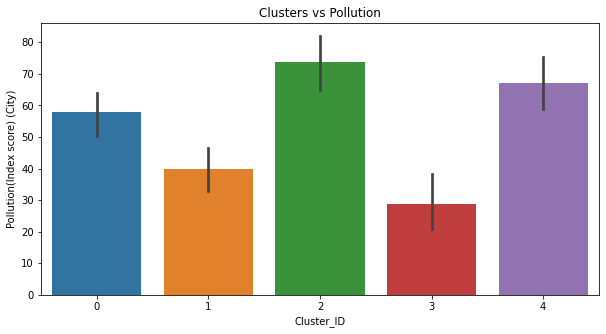

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(y='Pollution(Index score) (City)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Pollution')
plt.show()

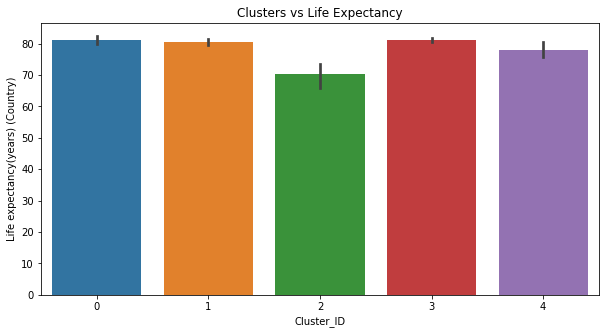

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(y='Life expectancy(years) (Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Life Expectancy')
plt.show()